#Phân loại sức khoẻ thai nhi bằng phương pháp RandomForest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center>
  <img src="https://blog.pregistry.com/wp-content/uploads/2018/08/AdobeStock_90496738.jpeg">
  <small>Source: Google</small>
</center>

  <p>
  Tử vong thai nhi đề cập đến thai chết lưu. Nó bao gồm bất kỳ trường hợp thai chết nào sau 20 tuần tuổi thai.

  Máy chụp tim (CTG) là một lựa chọn đơn giản và dễ tiếp cận với chi phí để đánh giá sức khỏe thai nhi, cho phép các chuyên gia chăm sóc sức khỏe hành động để ngăn ngừa tử vong ở trẻ và mẹ.
  
  Chụp tim thai là một phương tiện kỹ thuật ghi lại nhịp tim thai và các cơn co tử cung trong thai kỳ. Nó được sử dụng phổ biến nhất trong tam cá nguyệt thứ ba và mục đích của nó là để theo dõi tình trạng khỏe mạnh của thai nhi và cho phép phát hiện sớm tình trạng suy thai. Một CTG bất thường có thể cho thấy sự cần thiết phải can thiệp nguy cơ nguy hiểm cho con.
  </p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Dữ liệu đầu vào
Lấy từ: https://www.kaggle.com/taha07/fetal-health-classification/data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NMT_VLUTE/Datasets/fetal_health.csv')

## Các thuộc tính biểu đồ tim cần được sử dụng trong mô hình

| Ký hiệu |	Mô tả|
| ----------------|---------------------|
|LB	| Đường cơ sở nhịp tim của thai nhi (nhịp mỗi phút|
|AC	| Số lần tăng tốc mỗi giây|
|FM	| Số cử động của thai nhi trong một giây|
|UC	| Số cơn co tử cung mỗi giây|
|DL	| Số lần giảm tốc ánh sáng trong một giây|
|DS	| Số lần giảm tốc nghiêm trọng mỗi giây|
|DP	| Số lần giảm tốc kéo dài mỗi giây|
|ASTV	| Phần trăm thời gian có sự thay đổi ngắn hạn bất thường|
|MSTV	| Giá trị trung bình của sự thay đổi ngắn hạn|
|ALTV	| Phần trăm thời gian có sự thay đổi dài hạn bất thường|
|MLTV	| Giá trị trung bình của sự thay đổi dài hạn|
|Width| Chiều rộng của biểu đồ FHR histogram|
|Min	| Tối thiểu FHR histogram|
|Max	| Tối đa của FHR histogram|
|Nmax	| Số lượng đỉnh của histogram|
|Nzeros	|Số lượng histogram zeroes|
|Mode	| Trạng thái Histogram|
|Median	| Histogram Trung vị|
|Variance	| Histogram phương sai|
|Tendency |	Xu hướng Histogram|
|NSP	| Mã lớp trạng thái bào thai (N=Bình thường, S=Nghi ngờ,P=Bệnh lý)|


## Các chỉ số cụ thể

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

ko có giá trị nào rỗng trong tệp dữ liệu

## BIỂU ĐỒ DỮ LIỆU ĐẦU VÀO

### BIỂU ĐỒ CỘT

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


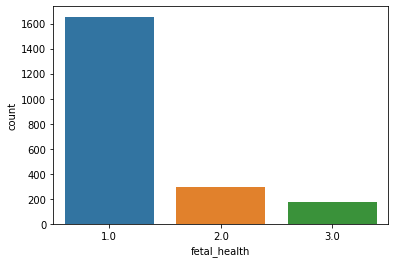

In [ ]:
sns.countplot(x='fetal_health', data=df)
print(df['fetal_health'].value_counts())

### BIỂU ĐỒ TRÒN

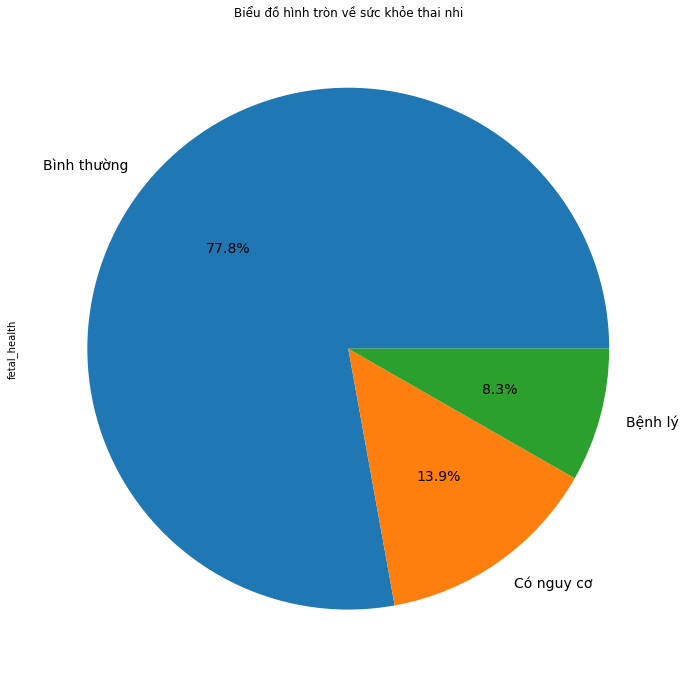

In [ ]:
df2=df.copy(deep=True)
pie1=pd.DataFrame(df2['fetal_health'].replace(1.0,'Bình thường').replace(2.0,'Có nguy cơ').replace(3.0,'Bệnh lý').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Biểu đồ hình tròn về sức khỏe thai nhi',y = 'fetal_health', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(12,12))

Chúng ta có thể thấy rằng có vấn đề mất cân bằng lớp trong tập dữ liệu này. Điều này có nghĩa là không thể sử dụng độ chính xác làm thước đo để đánh giá hiệu suất của mô hình của mình. Số liệu phù hợp nhất để đánh giá mô hình có thể là:
1. F1 Score
2. Recall
3. độ chính xác

Trước khi đi sâu vào tìm hiểu dữ liệu và các tính năng, trước tiên chúng ta hãy xem ba loại sức khỏe thai nhi khác nhau đại diện cho điều gì. Cùng tham khảo bảng dưới đây.

Nguồn: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4812878/

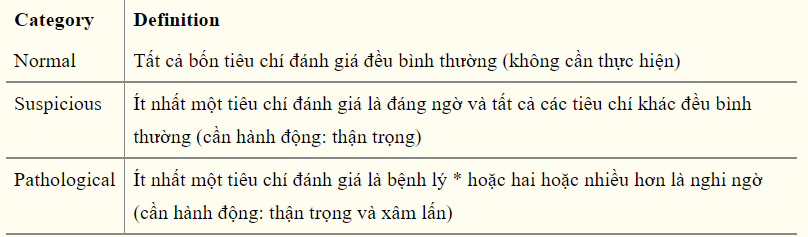

###BIỂU ĐỒ HISTOGRAM TỪNG THÀNH PHẦN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9f627e50>,
      dtype=object)

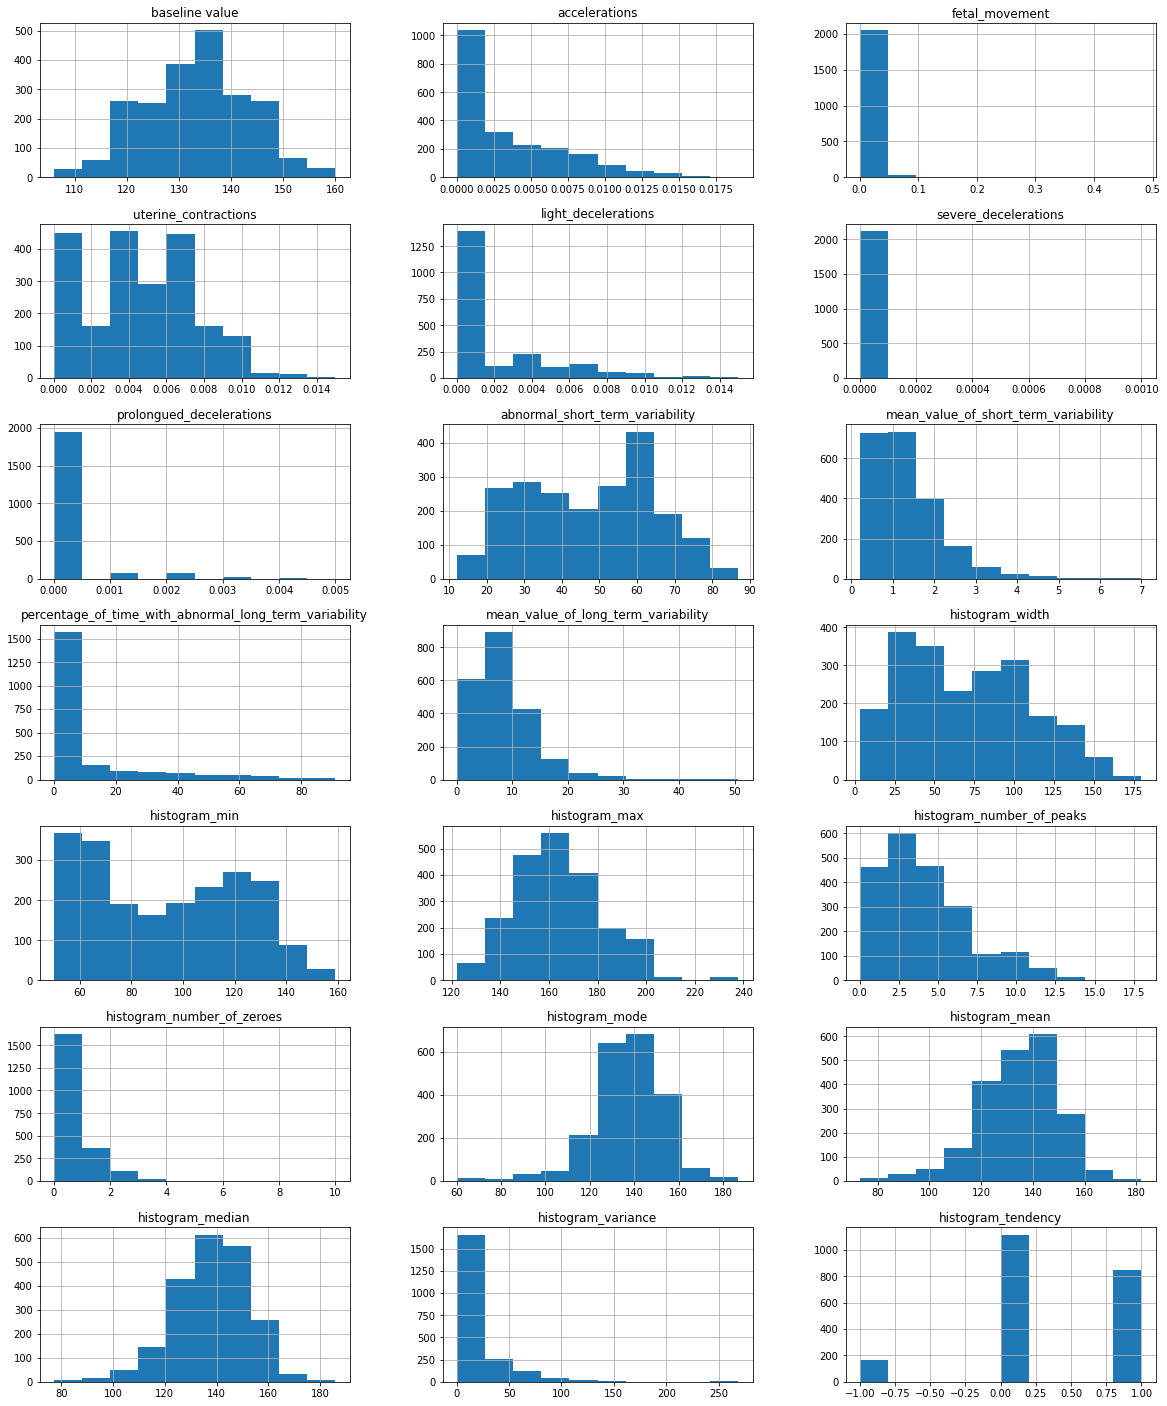

In [ ]:
df.iloc[:,:-1].hist(figsize=[20,25], layout=[7,3])

Xem xét cẩn thận từng biểu đồ, có thể nói rằng ít nhất 8 biểu đồ rất lệch và chứa một lượng lớn các giá trị ngoại lai, có thể được chia tỷ lệ bằng cách sử dụng kỹ thuật 'robust scaling', nhưng tất cả các giá trị này đều đúng và được xác nhận bởi nhà xuất bản tập dữ liệu.

Ngoài ra, chúng ta có thể thấy rằng các thông số đã được xử lý vì một số trong số chúng được tạo bằng cách phân loại hoặc mã hóa các biến thứ tự phân loại, chẳng hạn như: Light_decelerations, prolongued_decelerations, heavy_decelerations, histogram_number_of_zeroes và histogram_tendency, chứa một số giá trị cụ thể có thể có. Ngay cả nhãn cũng được mã hóa trong quá trình này, đây là lý do tại sao có các số thay vì tên thích hợp của các lớp.

Về tất cả các đối tượng khác không được đề cập ở trên tương ứng với các đặc trưng liên tục bằng số, một số trong số này đã được tiêu chuẩn hóa trong khi các đối tượng khác thì chưa. Để đảm bảo hiệu suất hoàn hảo của các mô hình bộ phân loại, chúng tôi sẽ chia tỷ lệ mọi tính năng bằng cách tiêu chuẩn hóa.

Sau đây, chúng ta có thể thấy 5 tính năng được đề cập và mỗi tính năng chứa bao nhiêu giá trị duy nhất:


In [ ]:
print('Số lượng giá trị duy nhất trong thông số light_decelerations:',len(df.light_decelerations.unique()))
print('Số lượng giá trị duy nhất trong thông số prolongued_decelerations:',len(df.prolongued_decelerations.unique()))
print('Số lượng giá trị duy nhất trong thông số severe_decelerations:',len(df.severe_decelerations.unique()))
print('Số lượng giá trị duy nhất trong thông số histogram_number_of_zeroes:',len(df.histogram_number_of_zeroes.unique()))
print('Số lượng giá trị duy nhất trong thông số histogram_tendency:',len(df.histogram_tendency.unique()))

Số lượng giá trị duy nhất trong thông số light_decelerations: 16
Số lượng giá trị duy nhất trong thông số prolongued_decelerations: 6
Số lượng giá trị duy nhất trong thông số severe_decelerations: 2
Số lượng giá trị duy nhất trong thông số histogram_number_of_zeroes: 9
Số lượng giá trị duy nhất trong thông số histogram_tendency: 3


### Tóm tắt thống kê

In [ ]:
df.iloc[:,:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### Các thông số bị lệch nhất

In [ ]:
df[['fetal_movement', 'histogram_number_of_zeroes', 'histogram_variance', 'light_decelerations',
   'mean_value_of_long_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability',
   'prolongued_decelerations','severe_decelerations']].describe().T

,count,mean,std,min,25%,50%,75%,max
fetal_movement,2126.0,0.009481,0.046666,0.0,0.0,0.0,0.003,0.481
histogram_number_of_zeroes,2126.0,0.323612,0.706059,0.0,0.0,0.0,0.000,10.000
histogram_variance,2126.0,18.808090,28.977636,0.0,2.0,7.0,24.000,269.000
light_decelerations,2126.0,0.001889,0.002960,0.0,0.0,0.0,0.003,0.015
mean_value_of_long_term_variability,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.800,50.700
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.000,91.000
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.0,0.0,0.000,0.005
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.0,0.0,0.000,0.001


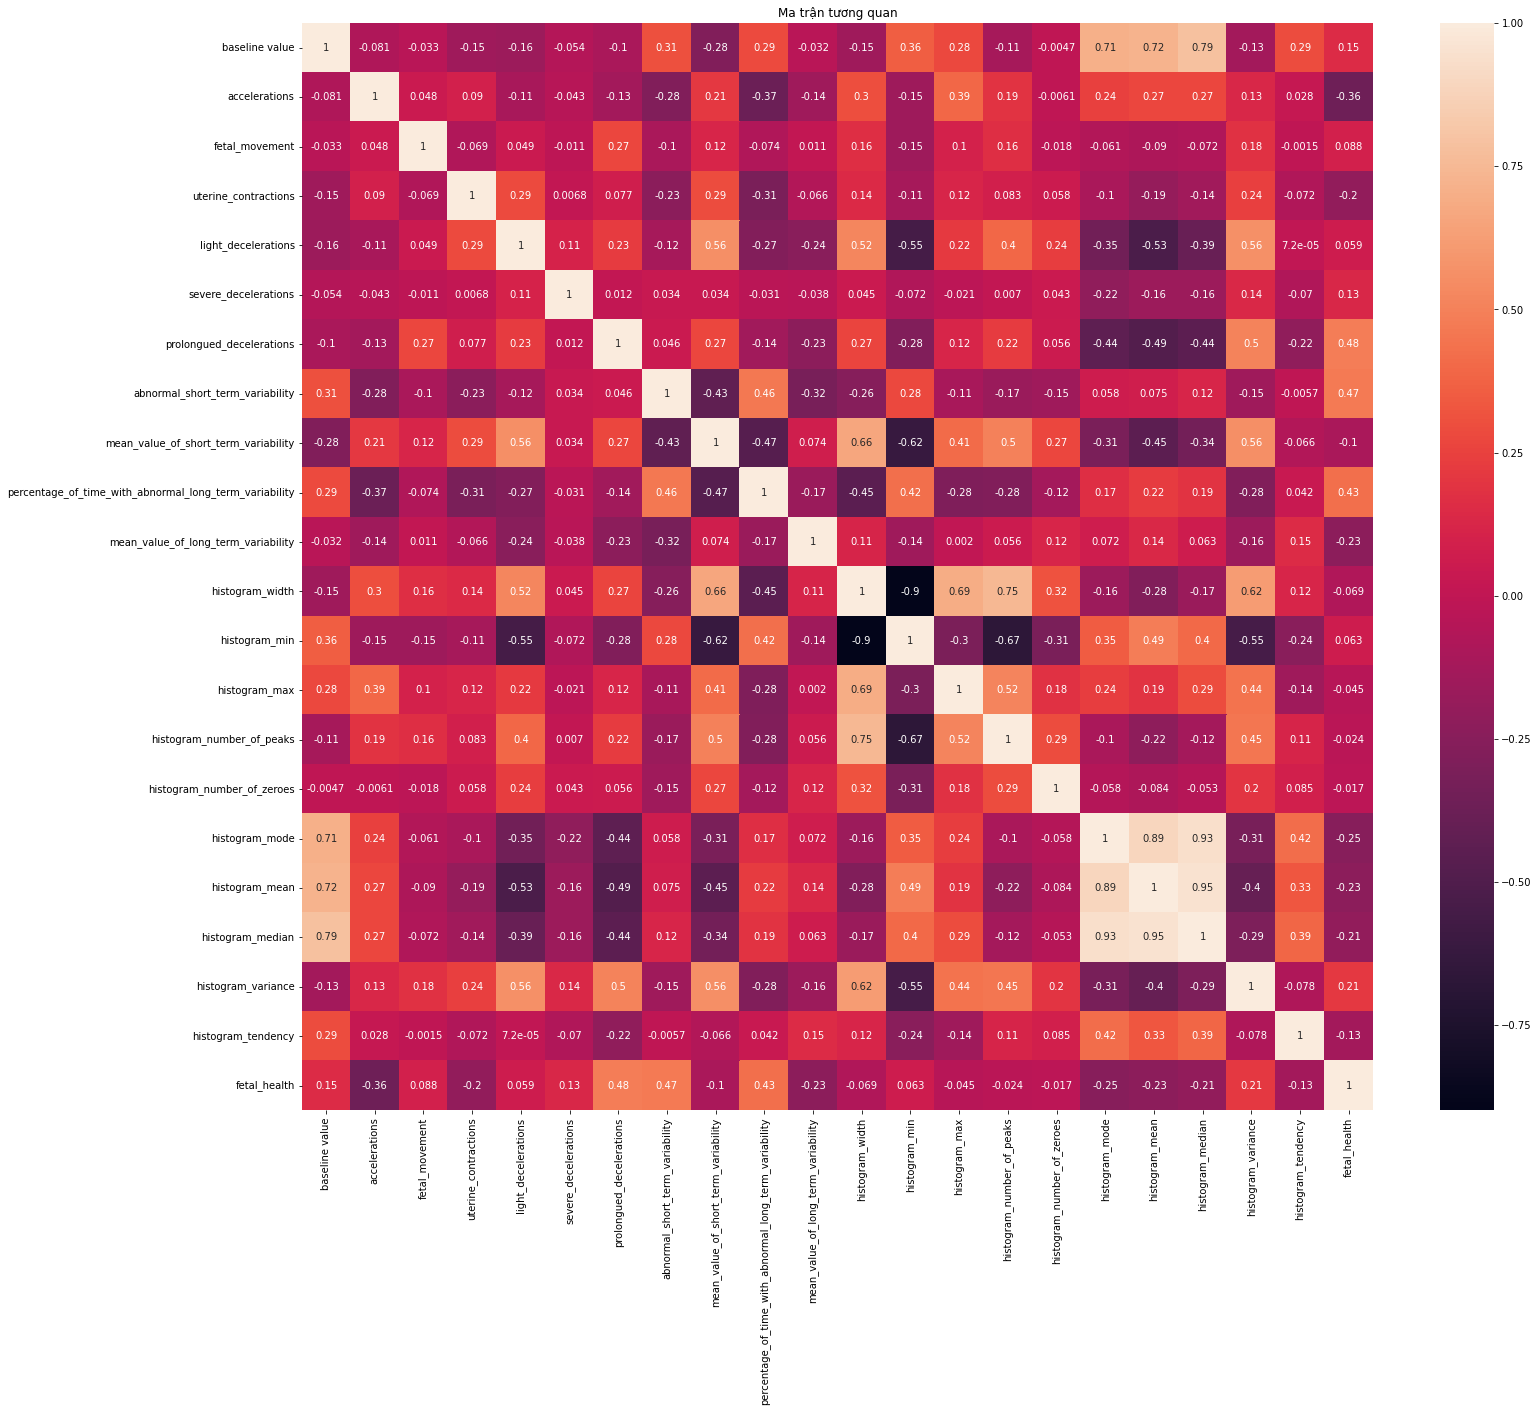

In [ ]:
corr = df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True)
plt.title("Ma trận tương quan")
plt.show()

Từ ma trận tương quan trên, chúng ta có thể nhận thấy rằng các đặc điểm sau đây cho thấy một số mối tương quan với sức khỏe thai nhi biến mục tiêu:
1. gia tốc (corr tiêu cực)
2. co thắt tử cung (corr âm)
3. prolonged_decelerations (corr tích cực)
4. sự thay đổi bất thường trong ngắn hạn (corr tích cực)
5. tỷ lệ phần trăm thời gian có sự thay đổi dài hạn bất thường (corr dương)



###Chi tiết về các thông số ảnh hưởng

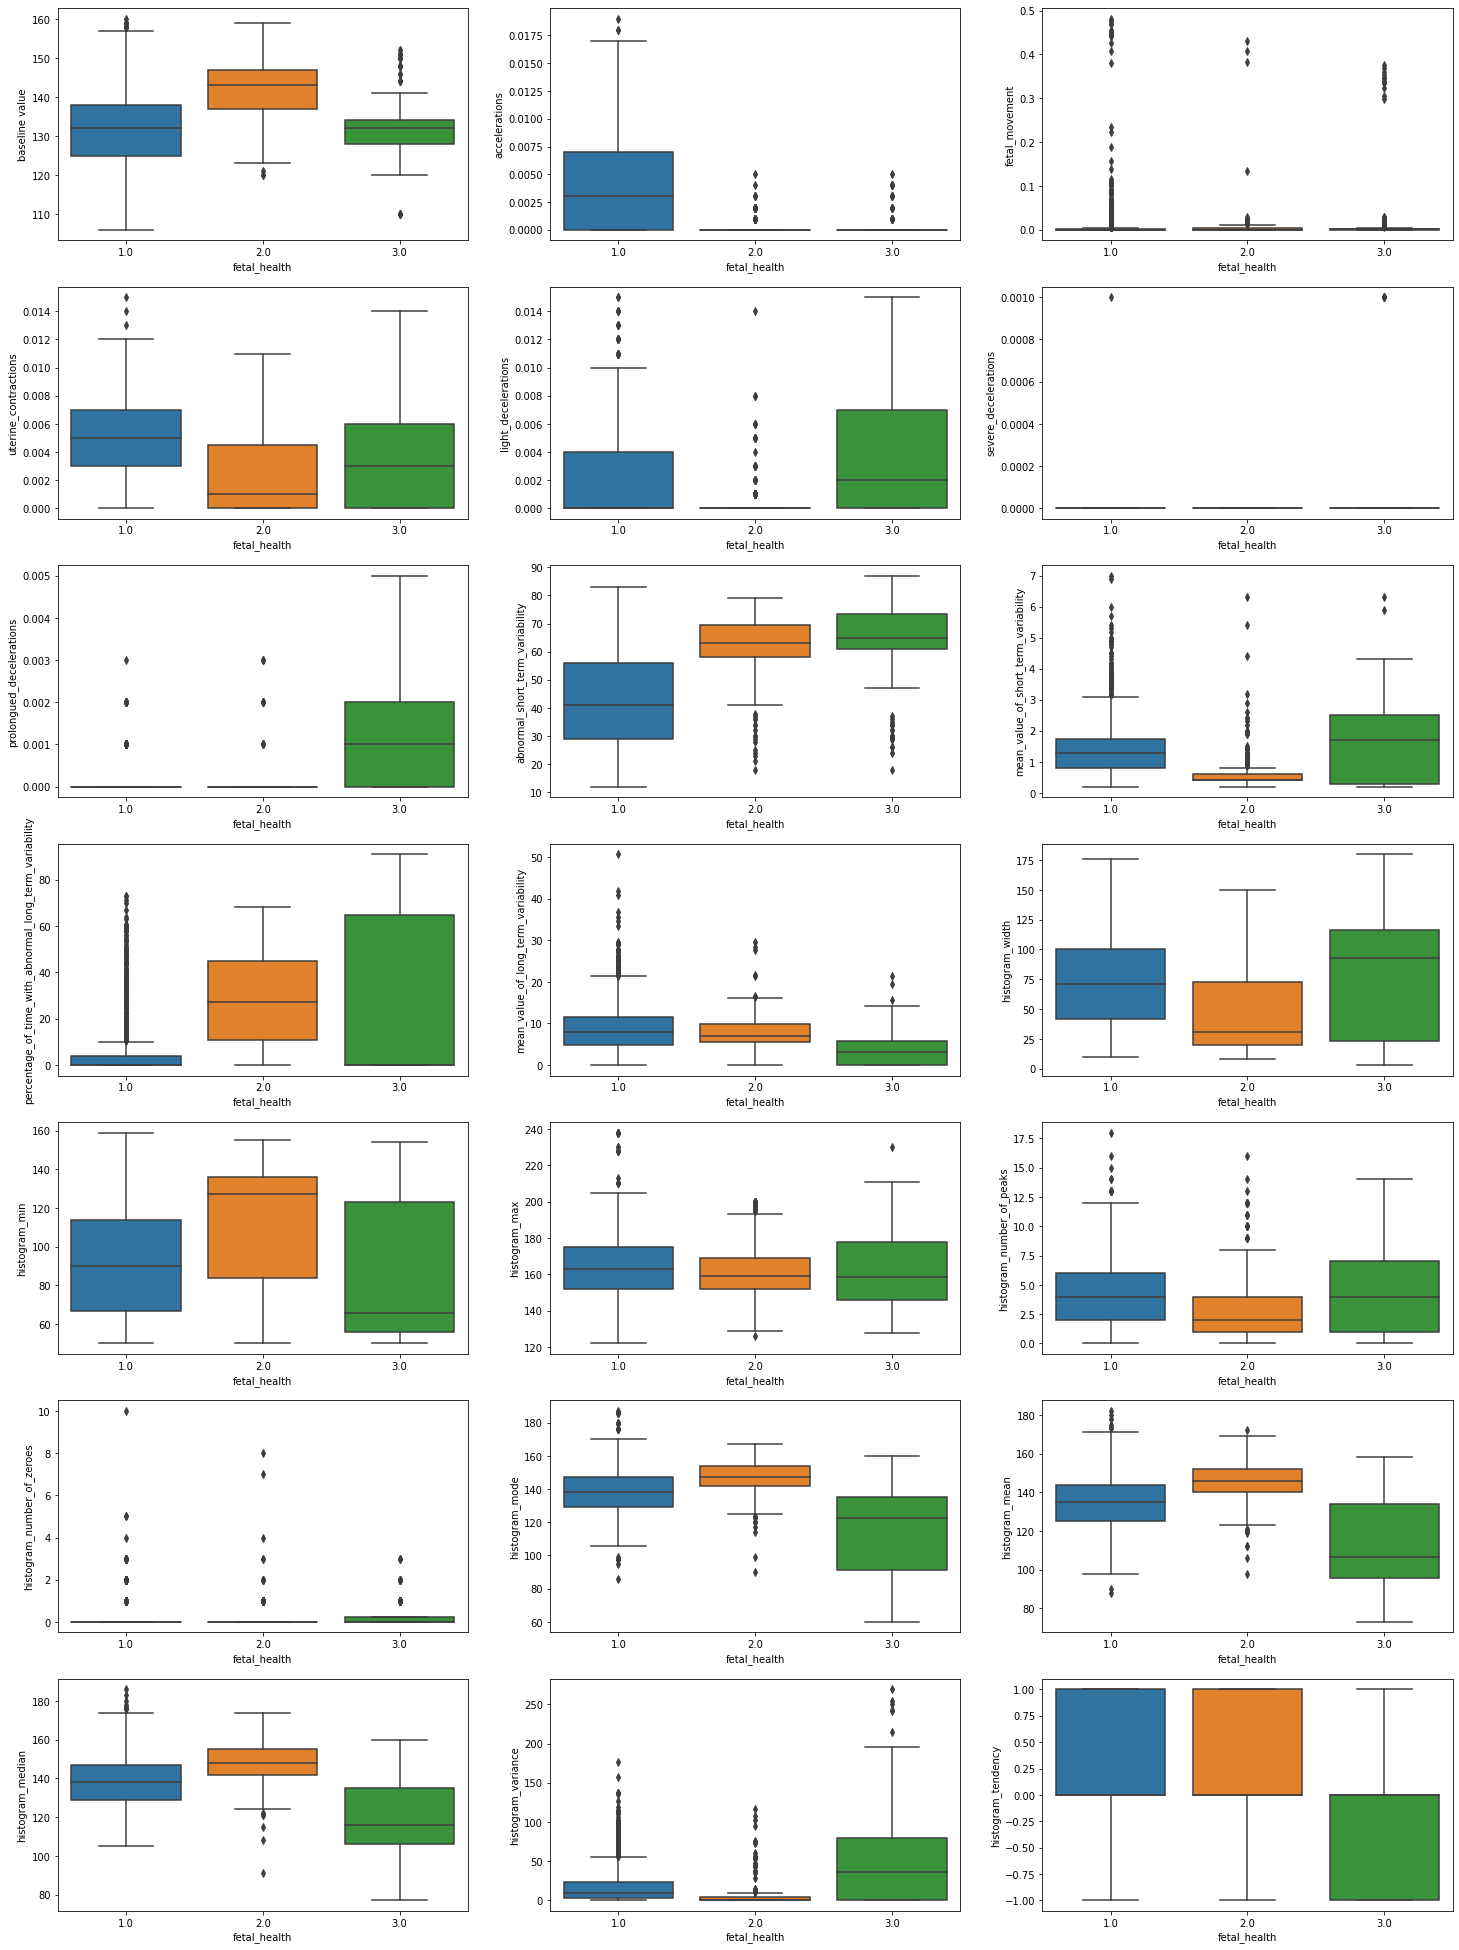

In [ ]:
plt.figure(figsize=(25,35))
i=1
for feat in df.iloc[:,:-1].columns:
    plt.subplot(7,3,i)
    sns.boxplot(x='fetal_health',y=feat,data=df)
    i+=1

Một số ô hộp này trông giống như IQR gần như rỗng, nhưng điều này là do có một vài giá trị duy nhất trong mỗi đối tượng là sản phẩm của việc phân loại và mã hóa các biến phân loại theo thứ tự.

Có thể xem label là một biến số liên tục vì khi số lượng ngày càng tăng về độ lớn thì nhiều khả năng thai nhi sẽ gặp vấn đề về sức khỏe, do đó chúng ta có thể tương quan điều này với các đặc điểm và diễn giải tương quan pearson dương như một đặc điểm có tỷ lệ thuận với vấn đề sức khỏe.

Bây giờ dựa trên giả định này, chúng ta hãy tạo một bản đồ nhiệt thể hiện mối tương quan pearson của từng đối tượng địa lý với nhãn:

(0.0, 22.0)

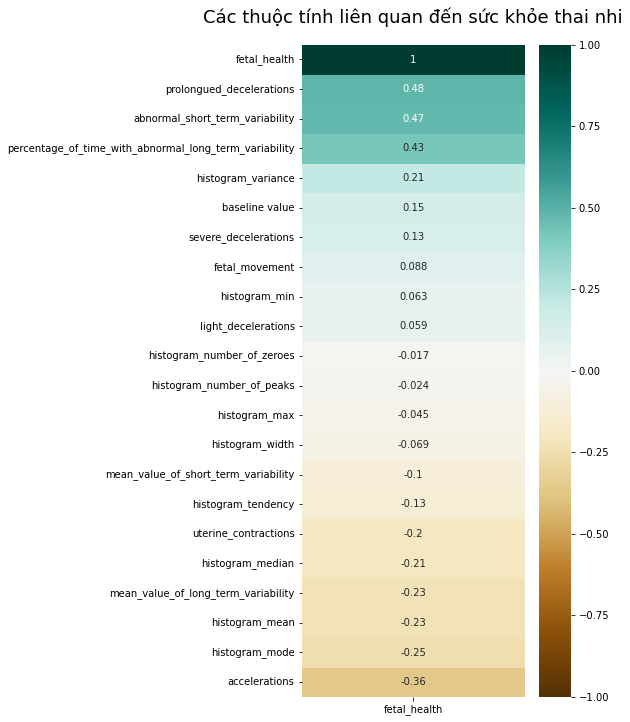

In [ ]:
plt.figure(figsize=(5, 12))
heatmap = sns.heatmap(df.corr()[['fetal_health']].sort_values(by='fetal_health', ascending=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Các thuộc tính liên quan đến sức khỏe thai nhi', fontdict={'fontsize':18}, pad=22)
heatmap.set_ylim([0,22])

Mặc dù thực tế là không có tính năng nào có mối tương quan chặt chẽ với label, có thể biết được cách mỗi tính năng tác động đến kết quả.

In [ ]:
features = df.iloc[:,:-1]
label=df['fetal_health']
features.shape, label.shape

((2126, 21), (2126,))

$ Features= 2n + \sum \limits _{j=1} ^{n-1} i $  

$ Features= 2n + \frac{n(n-1)}{2}$

Quá trình này sẽ tăng hơn 10 lần các thuộc tính, cụ thể là lên 252, đồng thời sẽ làm tăng độ phức tạp và không chính xác bởi khó khăn về kích thước, nhưng hãy đánh giá hiệu suất của các mô hình có và không có các tính năng bổ sung này.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
df3 = pf.fit_transform(features)
df3.shape

(2126, 252)

Phần sau sẽ giữ nguyên tên của từng cột, điều này rất quan trọng khi muốn xem tầm quan trọng và tác động của từng cột trong dự đoán:

In [ ]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(features.columns,p) for p in pf.powers_]]
output_df = pd.DataFrame(df3, columns = target_feature_names)
output_df.head()

,baseline value^1,accelerations^1,fetal_movement^1,uterine_contractions^1,light_decelerations^1,severe_decelerations^1,prolongued_decelerations^1,abnormal_short_term_variability^1,mean_value_of_short_term_variability^1,percentage_of_time_with_abnormal_long_term_variability^1,mean_value_of_long_term_variability^1,histogram_width^1,histogram_min^1,histogram_max^1,histogram_number_of_peaks^1,histogram_number_of_zeroes^1,histogram_mode^1,histogram_mean^1,histogram_median^1,histogram_variance^1,histogram_tendency^1,baseline value^2,baseline value^1xaccelerations^1,baseline value^1xfetal_movement^1,baseline value^1xuterine_contractions^1,baseline value^1xlight_decelerations^1,baseline value^1xsevere_decelerations^1,baseline value^1xprolongued_decelerations^1,baseline value^1xabnormal_short_term_variability^1,baseline value^1xmean_value_of_short_term_variability^1,baseline value^1xpercentage_of_time_with_abnormal_long_term_variability^1,baseline value^1xmean_value_of_long_term_variability^1,baseline value^1xhistogram_width^1,baseline value^1xhistogram_min^1,baseline value^1xhistogram_max^1,baseline value^1xhistogram_number_of_peaks^1,baseline value^1xhistogram_number_of_zeroes^1,baseline value^1xhistogram_mode^1,baseline value^1xhistogram_mean^1,baseline value^1xhistogram_median^1,...,histogram_min^1xhistogram_mean^1,histogram_min^1xhistogram_median^1,histogram_min^1xhistogram_variance^1,histogram_min^1xhistogram_tendency^1,histogram_max^2,histogram_max^1xhistogram_number_of_peaks^1,histogram_max^1xhistogram_number_of_zeroes^1,histogram_max^1xhistogram_mode^1,histogram_max^1xhistogram_mean^1,histogram_max^1xhistogram_median^1,histogram_max^1xhistogram_variance^1,histogram_max^1xhistogram_tendency^1,histogram_number_of_peaks^2,histogram_number_of_peaks^1xhistogram_number_of_zeroes^1,histogram_number_of_peaks^1xhistogram_mode^1,histogram_number_of_peaks^1xhistogram_mean^1,histogram_number_of_peaks^1xhistogram_median^1,histogram_number_of_peaks^1xhistogram_variance^1,histogram_number_of_peaks^1xhistogram_tendency^1,histogram_number_of_zeroes^2,histogram_number_of_zeroes^1xhistogram_mode^1,histogram_number_of_zeroes^1xhistogram_mean^1,histogram_number_of_zeroes^1xhistogram_median^1,histogram_number_of_zeroes^1xhistogram_variance^1,histogram_number_of_zeroes^1xhistogram_tendency^1,histogram_mode^2,histogram_mode^1xhistogram_mean^1,histogram_mode^1xhistogram_median^1,histogram_mode^1xhistogram_variance^1,histogram_mode^1xhistogram_tendency^1,histogram_mean^2,histogram_mean^1xhistogram_median^1,histogram_mean^1xhistogram_variance^1,histogram_mean^1xhistogram_tendency^1,histogram_median^2,histogram_median^1xhistogram_variance^1,histogram_median^1xhistogram_tendency^1,histogram_variance^2,histogram_variance^1xhistogram_tendency^1,histogram_tendency^2
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,14400.0,0.000,0.0,0.000,0.000,0.0,0.0,8760.0,60.0,5160.0,288.0,7680.0,7440.0,15120.0,240.0,0.0,14400.0,16440.0,14520.0,...,8494.0,7502.0,4526.0,62.0,15876.0,252.0,0.0,15120.0,17262.0,15246.0,9198.0,126.0,4.0,0.0,240.0,274.0,242.0,146.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14400.0,16440.0,14520.0,8760.0,120.0,18769.0,16577.0,10001.0,137.0,14641.0,8833.0,121.0,5329.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,17424.0,0.792,0.0,0.792,0.396,0.0,0.0,2244.0,277.2,0.0,1372.8,17160.0,8976.0,26136.0,792.0,132.0,18612.0,17952.0,18480.0,...,9248.0,9520.0,816.0,0.0,39204.0,1188.0,198.0,27918.0,26928.0,27720.0,2376.0,0.0,36.0,6.0,846.0,816.0,840.0,72.0,0.0,1.0,141.0,136.0,140.0,12.0,0.0,19881.0,19176.0,19740.0,1692.0,0.0,18496.0,19040.0,1632.0,0.0,19600.0,1680.0,0.0,144.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,17689.0,0.399,0.0,1.064,0.399,0.0,0.0,2128.0,279.3,0.0,1782.2,17290.0,9044.0,26334.0,665.0,133.0,18753.0,17955.0,18354.0,...,9180.0,9384.0,884.0,0.0,39204.0,

Bước cuối cùng của kỹ thuật tính năng là quá trình lấy mẫu quá mức, bởi vì nhãn không cân bằng, dự đoán sẽ có xu hướng thiên vị đối với lớp thường xuyên nhất, điều này rõ ràng là không tốt, vì vậy SMOTE sẽ được sử dụng để có cùng số trường hợp trên mỗi lớp.


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(output_df, label)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
X_res.shape
y_res.size

4965

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res , random_state=42, test_size = 0.3)

## Model Selection

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score

In [ ]:
print("Có tổng cộng "+str(len(df))+" hàng trên dữ liệu")

Có tổng cộng 2126 hàng trên dữ liệu


In [ ]:
X = df.drop(["fetal_health"],axis=1)
Y = df["fetal_health"]

In [ ]:
std_scale = StandardScaler()
X_sc = std_scale.fit_transform(X)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X_sc, Y, test_size=0.25, random_state=42)
print("Có tổng cộng "+str(len(X_train))+" hàng trên dữ liệu")
print("Có tổng cộng "+str(len(X_test))+" hàng trên dữ liệu")

Có tổng cộng 1594 hàng trên dữ liệu
Có tổng cộng 532 hàng trên dữ liệu


##Xử lý tránh mất cân bằng dữ liệu

Trong quá trình điều tra dữ liệu ban đầu, các lớp không cân bằng.

Để xử lý vấn đề các lớp mất cân bằng, ta sử dụng kỹ thuật lấy mẫu quá mức. Trong quá trình lấy mẫu quá mức, ta điền vào các lớp thiểu số với một số dữ liệu tổng hợp.


###1. Công nghệ SMOT

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


###2. ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


###3. SMOTE + Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


4. SMOTE + ENN

In [ ]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
def evaluate_model(clf, X_test, y_test, model_name, oversample_type):
  print('--------------------------------------------')
  print('Model ', model_name)
  print('Data Type ', oversample_type)
  y_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  precision = precision_score(y_test, y_pred, average='weighted')
  print(classification_report(y_test, y_pred))
  print("F1 Score ", f1)
  print("Recall ", recall)
  print("Precision ", precision)
  return [model_name, oversample_type, f1, recall, precision]

In [ ]:
models = {
    'DecisionTrees': DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
    'LinearSVC':LinearSVC(random_state=0),
    'AdaBoostClassifier':AdaBoostClassifier(random_state=42),
    'SGD':SGDClassifier()
}

In [ ]:
oversampled_data = {
    'ACTUAL':[X_train, y_train],
    'SMOTE':[X_train_sm, y_train_sm],
    'ADASYN':[X_train_ada, y_train_ada],
    'SMOTE_TOMEK':[X_train_smtom, y_train_smtom],
    'SMOTE_ENN':[X_train_smenn, y_train_smenn]
}

In [ ]:
final_output = []
for model_k, model_clf in models.items():
  for data_type, data in oversampled_data.items():
    model_clf.fit(data[0], data[1])
    final_output.append(evaluate_model(model_clf, X_test, y_test, model_k, data_type))

--------------------------------------------
Model  DecisionTrees
Data Type  ACTUAL
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       413
         2.0       0.80      0.85      0.83        82
         3.0       0.92      0.95      0.93        37

    accuracy                           0.94       532
   macro avg       0.90      0.92      0.91       532
weighted avg       0.94      0.94      0.94       532

F1 Score  0.9386188989575975
Recall  0.9379699248120301
Precision  0.9395945726899018
--------------------------------------------
Model  DecisionTrees
Data Type  SMOTE
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       413
         2.0       0.76      0.71      0.73        82
         3.0       0.81      0.92      0.86        37

    accuracy                           0.92       532
   macro avg       0.84      0.86      0.85       532
weighted avg       0.91      0.92      0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------
Model  LinearSVC
Data Type  SMOTE
              precision    recall  f1-score   support

         1.0       0.99      0.85      0.91       413
         2.0       0.54      0.79      0.64        82
         3.0       0.56      0.89      0.69        37

    accuracy                           0.84       532
   macro avg       0.70      0.84      0.75       532
weighted avg       0.89      0.84      0.86       532

F1 Score  0.8564378211106314
Recall  0.8421052631578947
Precision  0.89210839644124


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------
Model  LinearSVC
Data Type  ADASYN
              precision    recall  f1-score   support

         1.0       0.99      0.82      0.89       413
         2.0       0.45      0.59      0.51        82
         3.0       0.40      0.92      0.56        37

    accuracy                           0.79       532
   macro avg       0.61      0.77      0.65       532
weighted avg       0.86      0.79      0.81       532

F1 Score  0.8113243485588927
Recall  0.7875939849624061
Precision  0.8645050045584658


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------
Model  LinearSVC
Data Type  SMOTE_TOMEK
              precision    recall  f1-score   support

         1.0       0.99      0.84      0.91       413
         2.0       0.53      0.77      0.63        82
         3.0       0.52      0.86      0.65        37

    accuracy                           0.83       532
   macro avg       0.68      0.83      0.73       532
weighted avg       0.89      0.83      0.85       532

F1 Score  0.8488026591920187
Recall  0.8327067669172933
Precision  0.8871778653562337


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------
Model  LinearSVC
Data Type  SMOTE_ENN
              precision    recall  f1-score   support

         1.0       0.99      0.81      0.89       413
         2.0       0.47      0.76      0.58        82
         3.0       0.52      0.86      0.65        37

    accuracy                           0.81       532
   macro avg       0.66      0.81      0.71       532
weighted avg       0.88      0.81      0.83       532

F1 Score  0.8268582771059547
Recall  0.806390977443609
Precision  0.877718506081442
--------------------------------------------
Model  AdaBoostClassifier
Data Type  ACTUAL
              precision    recall  f1-score   support

         1.0       0.93      0.92      0.92       413
         2.0       0.65      0.73      0.69        82
         3.0       0.89      0.84      0.86        37

    accuracy                           0.88       532
   macro avg       0.82      0.83      0.82       532
weighted avg       0.89      0.88    

In [ ]:
final_df = pd.DataFrame(final_output, columns=['Model', 'DataType', 'F1', 'Recall', 'Precision'])

Sắp xếp dữ liệu theo tỉ lệ chính xác F1

In [ ]:
final_df.sort_values(by="F1", ascending=False)

,Model,DataType,F1,Recall,Precision
8,RandomForest,SMOTE_TOMEK,0.949907,0.949248,0.950995
6,RandomForest,SMOTE,0.949426,0.949248,0.949815
5,RandomForest,ACTUAL,0.948361,0.949248,0.948290
7,RandomForest,ADASYN,0.947870,0.947368,0.948598
0,DecisionTrees,ACTUAL,0.938619,0.937970,0.939595
9,RandomForest,SMOTE_ENN,0.920021,0.915414,0.932702
1,DecisionTrees,SMOTE,0.914611,0.915414,0.914619
3,DecisionTrees,SMOTE_TOMEK,0.908576,0.906015,0.913633
2,DecisionTrees,ADASYN,0.907025,0.906015,0.908729
4,DecisionTrees,SMOTE_ENN,0.905345,0.900376,0.918281


### Điều chỉnh siêu tham số

In [ ]:
param_grid = {
  'criterion':['gini', 'entropy'],
  'max_depth': [10, 20, 40, 80, 100],
  'max_features': ['auto', 'sqrt'],
  'n_estimators': [200, 400, 600, 800, 1000, 2000]
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=2)
rfc_cv.fit(X_train_smtom, y_train_smtom)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.3s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.2s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.2s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.1s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.2s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   2.4s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   2.3s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=10, max_featur

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 63.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 2000}

In [ ]:
rf = RandomForestClassifier(n_estimators=2000, criterion='entropy', max_depth=20, max_features='auto')
rf.fit(X_train_smtom, y_train_smtom)
evaluate_model(rf, X_test, y_test, 'RandomForest', 'SMOTE+TOMEK')

--------------------------------------------
Model  RandomForest
Data Type  SMOTE+TOMEK
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       413
         2.0       0.85      0.88      0.86        82
         3.0       0.90      0.97      0.94        37

    accuracy                           0.95       532
   macro avg       0.91      0.94      0.92       532
weighted avg       0.95      0.95      0.95       532

F1 Score  0.9534276346219396
Recall  0.9530075187969925
Precision  0.954212194382473


['RandomForest',
 'SMOTE+TOMEK',
 0.9534276346219396,
 0.9530075187969925,
 0.954212194382473]

In [ ]:
import pickle
filename = 'fetal-health-model.pkl'
pickle.dump(rf, open(filename, 'wb'))